# Simplyfied geologic model of a layered subsurface


### written by A. Ziegon


Imports

In [1]:
# Imports and settings
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')

import gempy as gp

# Importing auxiliary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Setting options
np.random.seed(1515)
pd.set_option('precision', 2)

Not subsurface compatibility available


### Loading surface points and orientations

In [2]:
geo_model_layers = gp.create_model('simple_layers')

# Importing the data from CSV-files and setting extent and resolution
gp.init_data(geo_model_layers, [0, 150, 0, 150., -60, 10], [60, 60, 100],
             path_i='RM_surface_points_layers.csv', path_o='RM_orientations_layers.csv',
             default_values=True)

Active grids: ['regular']


simple_layers  2022-12-01 10:01

Sorting formations

In [11]:
gp.map_stack_to_surfaces(geo_model_layers,
                         {"Layers":('Soil','SS','CSS','basement')},
                         remove_unused_series=True)

,surface,series,order_surfaces,color,id
0,CSS,Layers,1,#8b4513,1
1,SS,Layers,2,#ff9912,2
2,Soil,Layers,3,#bcee68,3
3,basement,Layers,4,#8b8878,4


Set Colorscheme

In [9]:
geo_model_layers.surfaces.colors.change_colors({'CSS': '#8b4513','SS':'#ff9912',
                                                'basement':'#8b8878','Soil':'#bcee68'})

Set random topography

In [7]:
#geo_model_layers.set_topography(source='random')

### First inspection of data points in 2D and 3D

C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


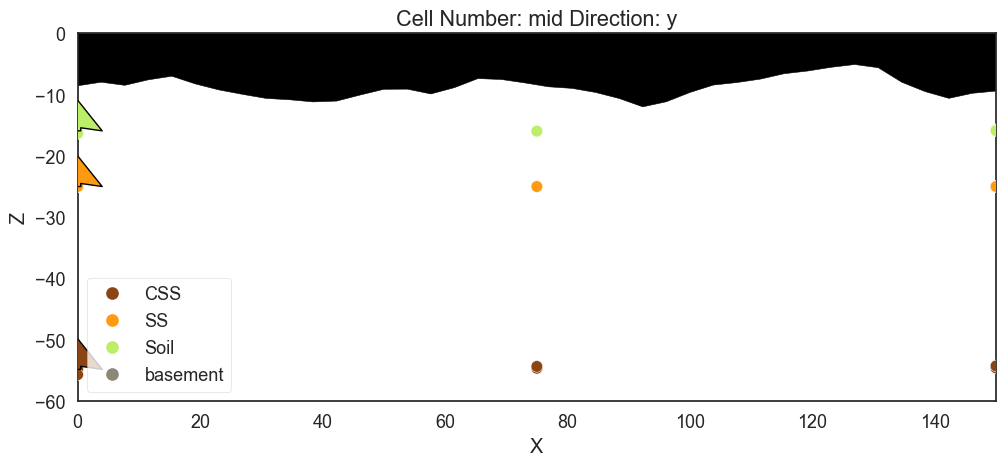

In [26]:
plot = gp.plot_2d(geo_model_layers, show_lith=False, show_boundaries=False, show_topography=False)
plt.show()

gpv = gp.plot_3d(geo_model_layers, image=False, plotter_type='basic', show_topography=True)

### Set interpolator and solve model

In [8]:
gp.set_interpolator(geo_model_layers, compile_theano=True, theano_optimizer='fast_compile')
sol = gp.compute_model(geo_model_layers, debug=False)

Setting kriging parameters to their default values.
Compiling theano function...


C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are prob

Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                  values
range            223.38
$C_o$            1188.1
drift equations     [3]


Visualizing solution in 3D

In [9]:
ver, sim = gp.get_surfaces(geo_model_layers)
gpv = gp.plot_3d(geo_model_layers, show_data=True, show_lith=True, image=False, plotter_type='background')

C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\pyvista\plotting\tools.py:571: PyvistaDeprecationWarning: The usage of `parse_color` is deprecated in favor of the new `Color` class.
  warnings.warn(


Visualizing cross sections for further insoection

C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


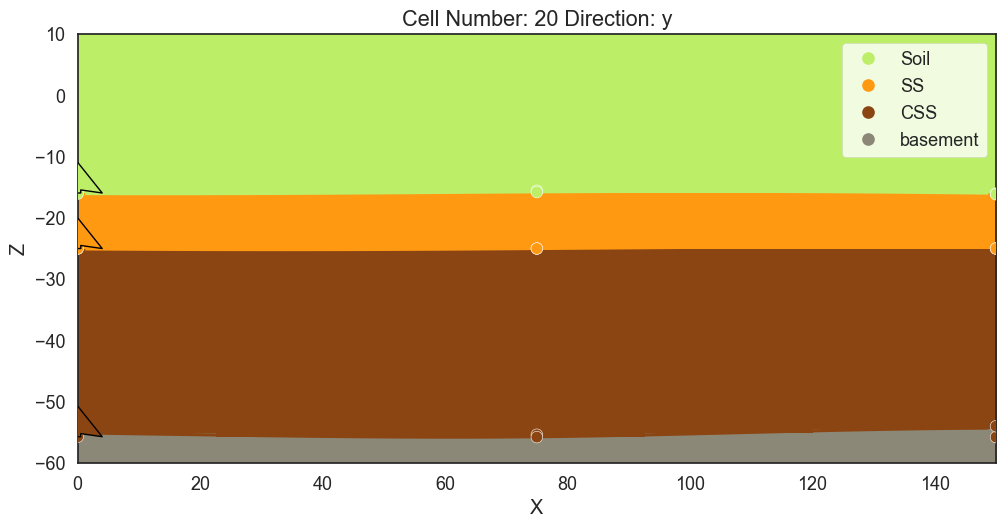

In [11]:
gp.plot_2d(geo_model_layers, show_data=True, direction='y', cell_number=20,
           plot_data=True)#, show_topography=True, section_names=['topography'])
plt.show()